<a href="https://colab.research.google.com/github/MaxKranewitter/MSc-WU/blob/main/MSc_Max_Kranewitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# My Google Drive folder path to all tweets
path_tweets = "/content/drive/MyDrive/tweets"

# List all files
print(os.listdir(path_tweets))

['the_5678s.jsonl', 'lostskydiary.jsonl', 'umek_1605.jsonl', 'alestormband.jsonl', 'thefratellis.jsonl', 'twaynebsm.jsonl', 'HardRockSofa.jsonl', 'garlandjeffreys.jsonl', 'beartoothband.jsonl', 'Soilwork.jsonl', 'faulandwad.jsonl', 'juddsofficial.jsonl', 'Robert_Redweik.jsonl', 'martinamcbride.jsonl', 'KreeshaTurner.jsonl', 'SJofficial.jsonl', 'findingfletcher.jsonl', 'williecolon.jsonl', 'friendsinparis.jsonl', 'turbonegrohq.jsonl', 'Phillips.jsonl', 'WE_THE_BOYZ.jsonl', 'nategoodmusic.jsonl', 'druhill4real.jsonl', 'keithape.jsonl', 'fatonimusik.jsonl', 'menitrust.jsonl', 'plasmasolutions.jsonl', 'thesunshadows.jsonl', 'gagayasar.jsonl', 'absofacto.jsonl', 'fleetwoodmac.jsonl', 'xandriaband.jsonl', 'cookin3burners.jsonl', 'wmmorgan.jsonl', 'altanaag.jsonl', 'torreflorim.jsonl', 'The_CuttingCrew.jsonl', 'Goldmund.jsonl', 'mrvegasmusic.jsonl', 'bethhart.jsonl', 'ringostarrmusic.jsonl', 'rcity.jsonl', 'rascalflatts.jsonl', 'krrum.jsonl', 'nightlovell.jsonl', 'dodgyuk.jsonl', 'DrakeWhite.

In [3]:
import glob
import json

# Find all files with .jsonl extension
os.chdir(path_tweets)
data_list = glob.glob('*.jsonl')
list_all_list = []

In [4]:
import pandas as pd

# Iterate through the list of files
for i, data_file in enumerate(data_list):
    with open(data_file, 'r') as file:
        json_data = [json.loads(line) for line in file]
        list_all_list.append(pd.json_normalize(json_data))

In [6]:
# Check length of list
len(list_all_list) #9174 artists

9174

In [7]:
# Combine all lists in one table
twtr_data = pd.concat(list_all_list, ignore_index=True, sort=False)
print(twtr_data.head())

        spotify_artist_id  cm_artist_id twitter_handle author_twitter_id  \
0  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
1  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
2  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
3  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
4  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   

              tweet_id              source  \
0  1208408170076495876  Twitter for iPhone   
1  1208153322407911424  Twitter for iPhone   
2  1208063222202322945  Twitter for iPhone   
3  1207710605785747457  Twitter for iPhone   
4  1207444083112730624  Twitter for iPhone   

                                                text lang reply_settings  \
0  Tonight!! Don’t miss it!!\n\n21 Sat December \...   en       everyone   
1     Sorry! We start 7:00!! https://t.co/CPsDCXgIbJ   en       everyone   
2  Tonight!! Don’t miss it!!\n\n20 Fri

In [8]:
from datetime import datetime

# Convert the 'timestp' column to date format
twtr_data['date'] = pd.to_datetime(twtr_data['timestp'].str[:10], format='%Y-%m-%d')

In [ ]:
# Filter for English language tweets only
twtr_data_en = twtr_data[twtr_data['lang'] == 'en']
print(twtr_data_en.head())

In [2]:
import os

# Path to wd
path = "/content/drive/MyDrive/fastText"

# Set wd
os.chdir(path)

# Check wd
os.getcwd()

'/content/drive/MyDrive/fastText'

In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq

# Convert the twtr_data_en DataFrame to a pyarrow.Table
table = pa.Table.from_pandas(twtr_data_en)

# Write the table to a Parquet file
pq.write_table(table, 'tweets_full.parquet') # Now I have the full dataset!

# df contains the full table
df = pq.read_table('tweets_full.parquet', ).to_pandas()

In [3]:
# Load the table
import pyarrow.parquet as pq

df = pq.read_table('tweets_full.parquet', ).to_pandas()

In [ ]:
#LABELING: generate training/testing data
import re
from string import punctuation

pct = set(punctuation)

ws_re = re.compile('\s+')
mentions_re = re.compile('@\w+')
url_re = re.compile('https[A-Za-z0-9/:\.]+')

with open('ft_data_sample.txt', 'w') as f:
    for t in df.sample(10000, random_state=123).text.to_list():

        # cleanup
        t = ''.join([c for c in t if c not in pct])

        ct = mentions_re.sub(' ', t)
        ct = url_re.sub(' ', ct)
        ct = ws_re.sub(' ', ct)
        ct = ct.lower()

        f.write(
            f'__label__UNK\t{ct}\n'
        )

In [ ]:
# A file with 10K tweets
!wc -l ft_data_sample.txt

In [ ]:
# Splitting into train and test
!head -n 9000 ft_data_sample.txt > ft_data_sample_train.txt
!tail -n 1000 ft_data_sample.txt > ft_data_sample_test.txt

In [ ]:
# Labeled train dataset: ft_data_train_final.txt
# Labeled test dataset: ft_data_test_labeled.txt

In [5]:
# Install fastText
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=922a662d37c564ec2ce95d17e73fcd072fe6f2c3fd0fbaf9655db57ce1a7e78d
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [6]:
# Train dataset with ft_data_train_final.txt

import fasttext

# Skipgram model :
model = fasttext.train_supervised(
    'ft_data_train_final.txt', epoch=100, dim=25, minn=3, loss='ns', lr = 1,
)

In [7]:
# Slightly better results when auto tuning

import fasttext

# Automatic hyperparameter optimization

model = fasttext.train_supervised(
    input = 'ft_data_train_final.txt', autotuneValidationFile = 'ft_data_test_labeled.txt',
    autotuneDuration = 600
)

In [8]:
# EVALUATE the model (k=3)

result = model.test('ft_data_test_labeled.txt', k = 3)
print(result)

# sample: 1662
# precision: 0.32
# recall: 0.95

(1662, 0.3150822302446851, 0.9452466907340553)


In [11]:
# EVALUATE the model

result = model.test('ft_data_test_labeled.txt', k = 1)
print(result)

# sample: 1662
# precision: 0.88
# recall: 0.88

(1662, 0.8772563176895307, 0.8772563176895307)


In [12]:
# Calculate the F1 score

precision = result[1]
recall = result[2]

f1_score = 2 * ((precision * recall) / (precision + recall))

print("F1 Score: ", f1_score)

# F1 Score = 0.88

F1 Score:  0.8772563176895307


In [ ]:
# Save model as .bin file
model.save_model("ft_model.bin")

In [6]:
# Load model

import fasttext

model = fasttext.load_model("ft_model.bin")

In [7]:
# Display labels # 20 labels
model.get_labels()

['__label__TRUMP',
 '__label__REP',
 '__label__RACE',
 '__label__COVID',
 '__label__POLIT',
 '__label__PRIDE',
 '__label__GUN',
 '__label__DEI',
 '__label__BLM',
 '__label__MENT',
 '__label__DEM',
 '__label__BIDEN',
 '__label__CLIMA',
 '__label__BREXIT',
 '__label__ABORT',
 '__label__CRIME',
 '__label__UKR',
 '__label__WAR',
 '__label__KANY',
 '__label__VOTE']

In [ ]:
# TESTING a few model tweets

In [13]:
model.predict("I'm sick of this president", k = 3, threshold = 0.5) # correct TRUMP

(('__label__TRUMP',), array([1.00001001]))

In [8]:
model.predict("I went to a black lives matter protest march", k = 3, threshold = 0.5) # correct BLM

(('__label__BLM',), array([1.00001001]))

In [15]:
model.predict("gun violence is on the rise", k = 3, threshold = 0.5) # correct GUN

(('__label__GUN',), array([1.00000978]))

In [16]:
model.predict("codify roe v wade, abortion is healthcare", k = 3, threshold = 0.5) # correct ABORT

(('__label__ABORT',), array([0.99929625]))

In [17]:
model.predict("george floyd was murdered by the police", k = 3, threshold = 0.5) # correct BLM

(('__label__BLM',), array([0.99977964]))

In [18]:
model.predict("dont be stupid, wear a mask", k = 1, threshold = 0.5) # correct COVID

(('__label__COVID',), array([1.00000882]))

In [19]:
model.predict("breonna taylor was unarmed when she was killed by the police", k = 3, threshold = 0.5) # correct BLM

(('__label__BLM',), array([0.99995959]))

In [20]:
model.predict("june is pride month where we celebrate the lgbt community", k = 1, threshold = 0.5) # correct PRIDE

(('__label__PRIDE',), array([0.99997008]))

In [21]:
model.predict("republicans are racist, antivax conspiracy theorists", k = 3, threshold = 0.5) # REP correct; RACE or COVID below 0.5

(('__label__REP',), array([0.93847132]))

In [22]:
model.predict("The UK Brexit was a mistake") # correct BREXIT

(('__label__BREXIT',), array([0.99966252]))

In [9]:
# THIS part is where I calculate the probability for a correct label and assign the UNCERTAIN label if the threshold is below 80%

# Extract 'text' column and convert to list
unlabeled_data = [text.replace('\n', ' ') for text in df['text'].tolist()]

In [10]:
# Predict labels and probabilities for each text in the unlabeled data
predictions = [model.predict(text) for text in unlabeled_data]

# Only retain labels with probability greater than or equal to the threshold
threshold = 0.8
predicted_labels = [label[0] if prob[0] >= threshold else '__label__UNCERTAIN' for label, prob in predictions]

# 'predicted_labels' now contains the predicted label (or '__label__UNCERTAIN' for low-probability predictions) for each text in 'unlabeled_data'

In [11]:
# Add labels back to original dataframe as new column
df['predicted_labels'] = predicted_labels

In [12]:
# Add one column to the dataframe named 'labels' that is the predicted_labels but without the __label__
df['labels'] = [label.replace("__label__", "") for label in predicted_labels]

print(df.head)

<bound method NDFrame.head of                spotify_artist_id  cm_artist_id   twitter_handle  \
0         5MZqcO35TJh5QXaFmvXmUy        420113        the_5678s   
1         5MZqcO35TJh5QXaFmvXmUy        420113        the_5678s   
2         5MZqcO35TJh5QXaFmvXmUy        420113        the_5678s   
3         5MZqcO35TJh5QXaFmvXmUy        420113        the_5678s   
4         5MZqcO35TJh5QXaFmvXmUy        420113        the_5678s   
...                          ...           ...              ...   
11770764  5aMmmNxw4vgpc5XC6hK0zp          1103  thecallingmusic   
11770765  5aMmmNxw4vgpc5XC6hK0zp          1103  thecallingmusic   
11770766  5aMmmNxw4vgpc5XC6hK0zp          1103  thecallingmusic   
11770768  5aMmmNxw4vgpc5XC6hK0zp          1103  thecallingmusic   
11770769  5aMmmNxw4vgpc5XC6hK0zp          1103  thecallingmusic   

         author_twitter_id             tweet_id              source  \
0                113365115  1208408170076495876  Twitter for iPhone   
1                113365

In [13]:
oldest_tweet = df['date'].min()
latest_tweet = df['date'].max()

print("Oldest tweet:", oldest_tweet)
print("Latest tweet:", latest_tweet)

Oldest tweet: 2017-01-01 00:00:00
Latest tweet: 2022-07-13 00:00:00


In [14]:
# Count how often the labels occur
label_counts = df['labels'].value_counts()

print(label_counts)

UNCERTAIN    8402467
PRIDE         103819
COVID          90324
POLIT          72103
TRUMP          56433
RACE           34351
DEI            33023
MENT           32214
GUN            26603
BLM            14803
REP            12989
CLIMA           8739
DEM             7675
ABORT           4624
BREXIT          3550
BIDEN           1010
CRIME            652
WAR               59
KANY              43
UKR               40
VOTE               3
Name: labels, dtype: int64


In [15]:
# Remove duplicate rows from the 'text' column
# Duplicates removed due to two users spamming the same message thousands of times
df_unique = df.drop_duplicates(subset='text', keep='first')

# Check
print(df_unique.head())

        spotify_artist_id  cm_artist_id twitter_handle author_twitter_id  \
0  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
1  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
2  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
3  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   
4  5MZqcO35TJh5QXaFmvXmUy        420113      the_5678s         113365115   

              tweet_id              source  \
0  1208408170076495876  Twitter for iPhone   
1  1208153322407911424  Twitter for iPhone   
2  1208063222202322945  Twitter for iPhone   
3  1207710605785747457  Twitter for iPhone   
4  1207444083112730624  Twitter for iPhone   

                                                text lang reply_settings  \
0  Tonight!! Don’t miss it!!\n\n21 Sat December \...   en       everyone   
1     Sorry! We start 7:00!! https://t.co/CPsDCXgIbJ   en       everyone   
2  Tonight!! Don’t miss it!!\n\n20 Fri

In [16]:
# UNIQUE

label_counts_unique = df_unique['labels'].value_counts()

print(label_counts_unique)

UNCERTAIN    8280211
PRIDE         100898
COVID          87770
POLIT          66729
TRUMP          56055
RACE           33305
DEI            31419
MENT           31059
GUN            25977
BLM            12640
REP            12585
CLIMA           8610
DEM             7485
ABORT           4160
BREXIT          3471
BIDEN           1001
CRIME            611
WAR               59
KANY              42
UKR               39
VOTE               3
Name: labels, dtype: int64


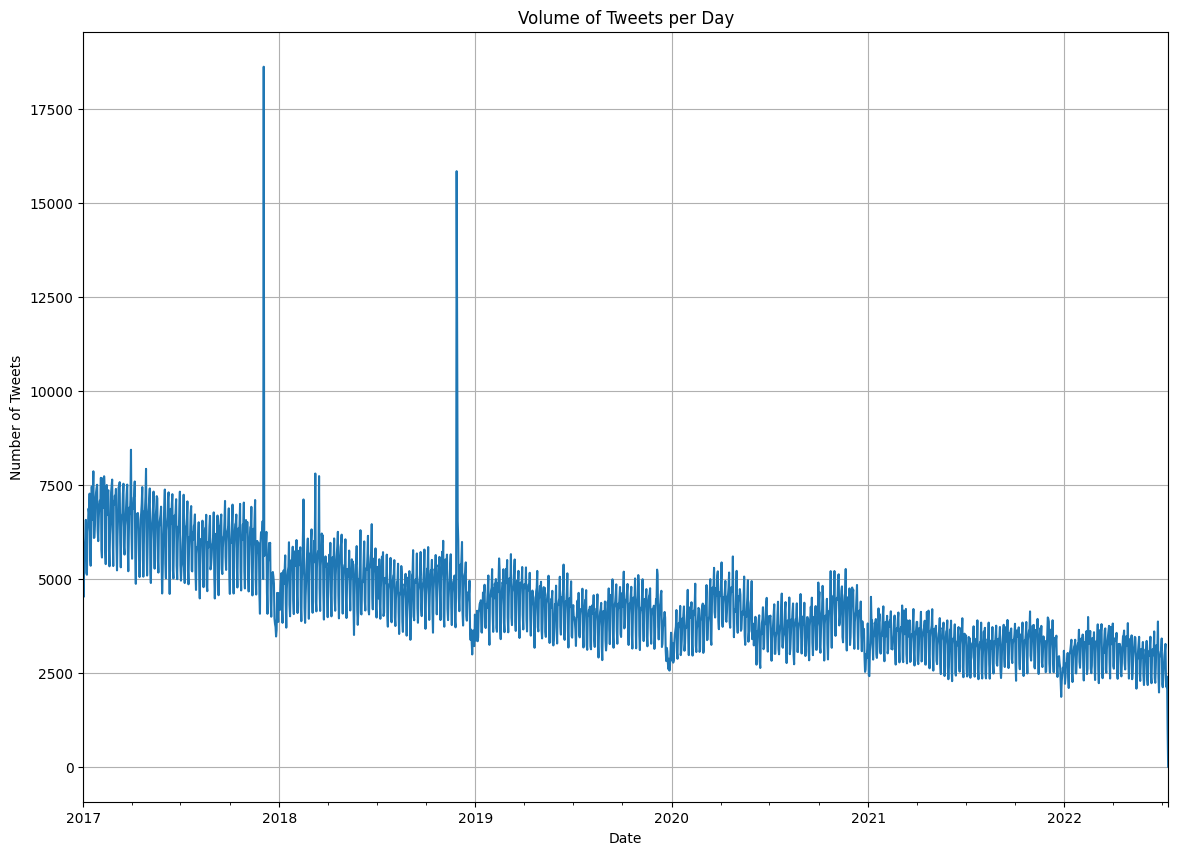

In [17]:
# Visualize volume of tweets per day
import matplotlib.pyplot as plt

# Group by the date and count the number of tweets each day
tweet_counts_per_day_unique = df_unique.groupby('date').size()

# Plot the data
plt.figure(figsize=(14,10))
tweet_counts_per_day_unique.plot(kind='line')
plt.title('Volume of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

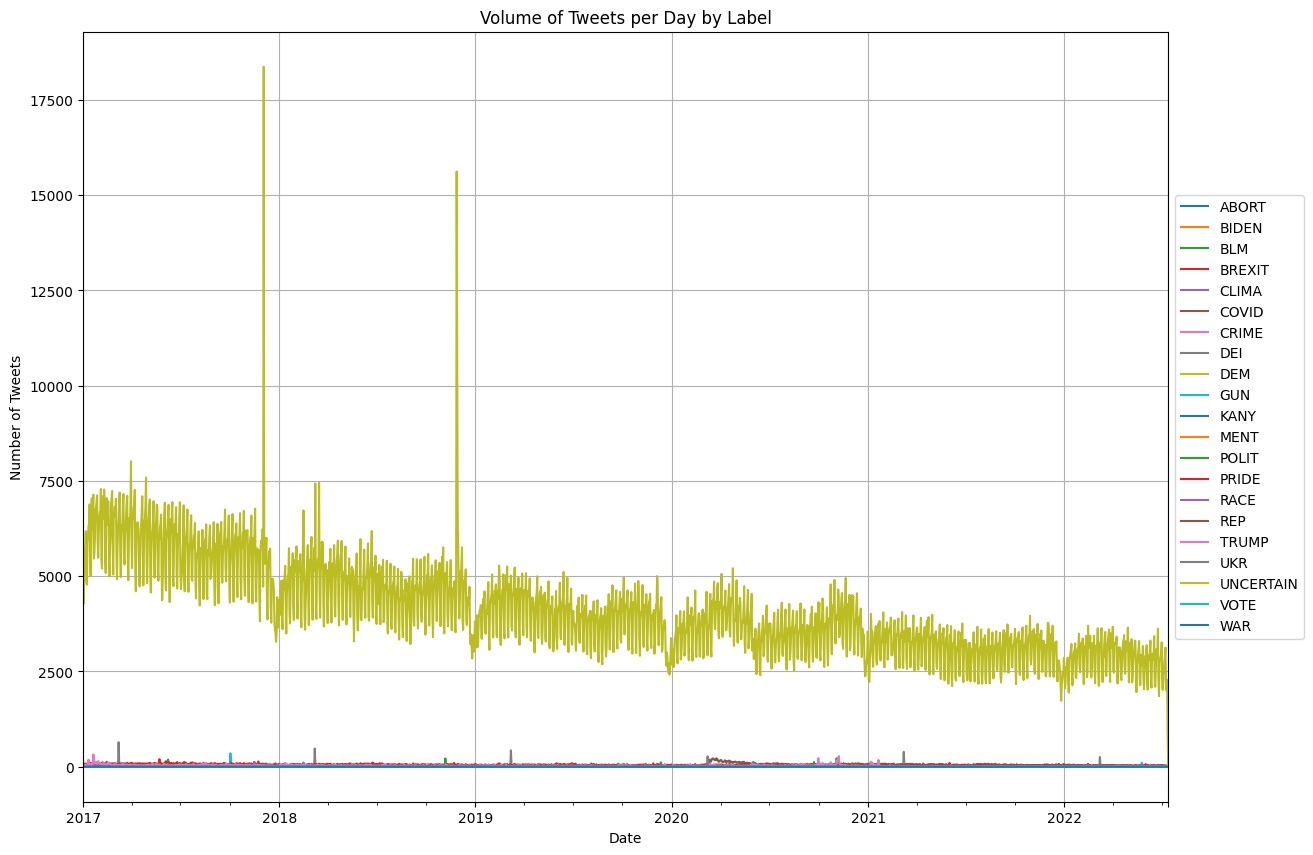

In [18]:
# CHECKING the label distribution

# Group by both 'date' and 'labels', then unstack the data
grouped_unique = df_unique.groupby(['date', 'labels']).size().unstack(fill_value=0)

# Moving the legend to the right

fig, ax = plt.subplots(figsize=(14,10))
grouped_unique.plot(kind='line', stacked=False, ax=ax)
plt.title('Volume of Tweets per Day by Label')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position

plt.show()

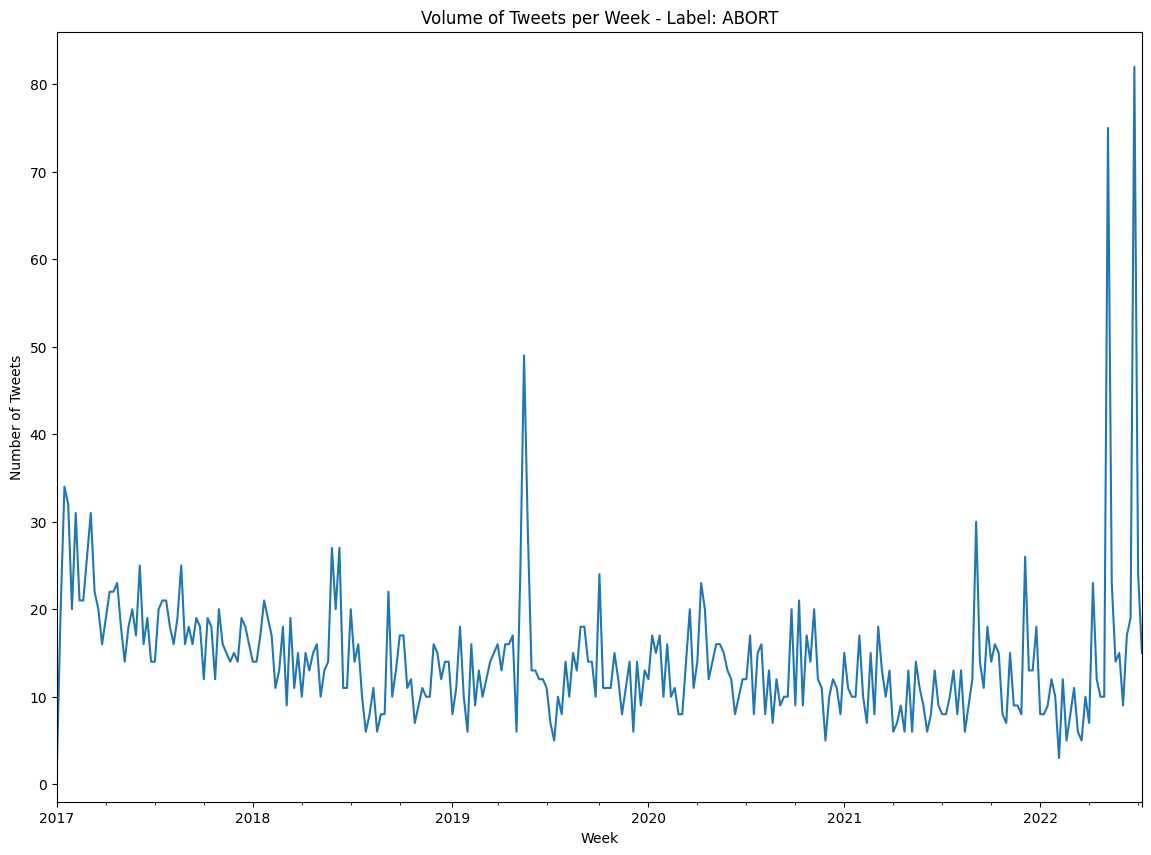

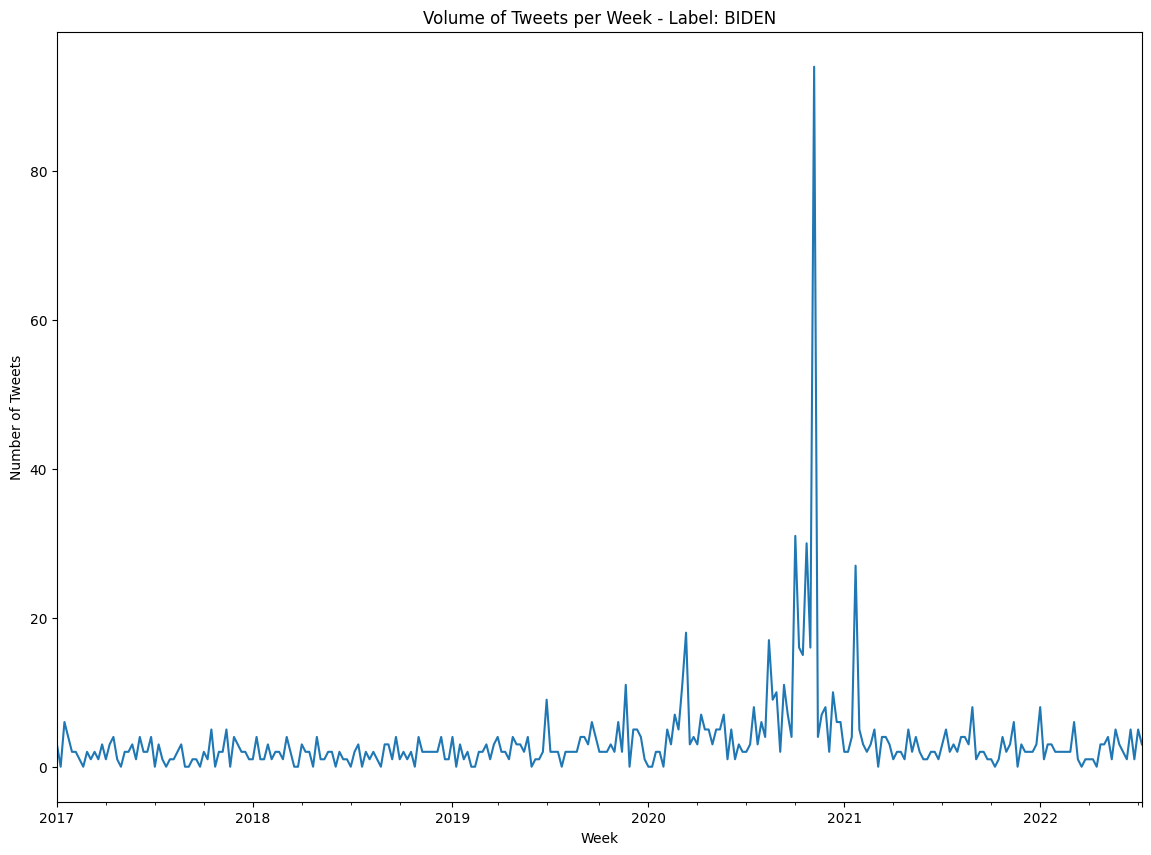

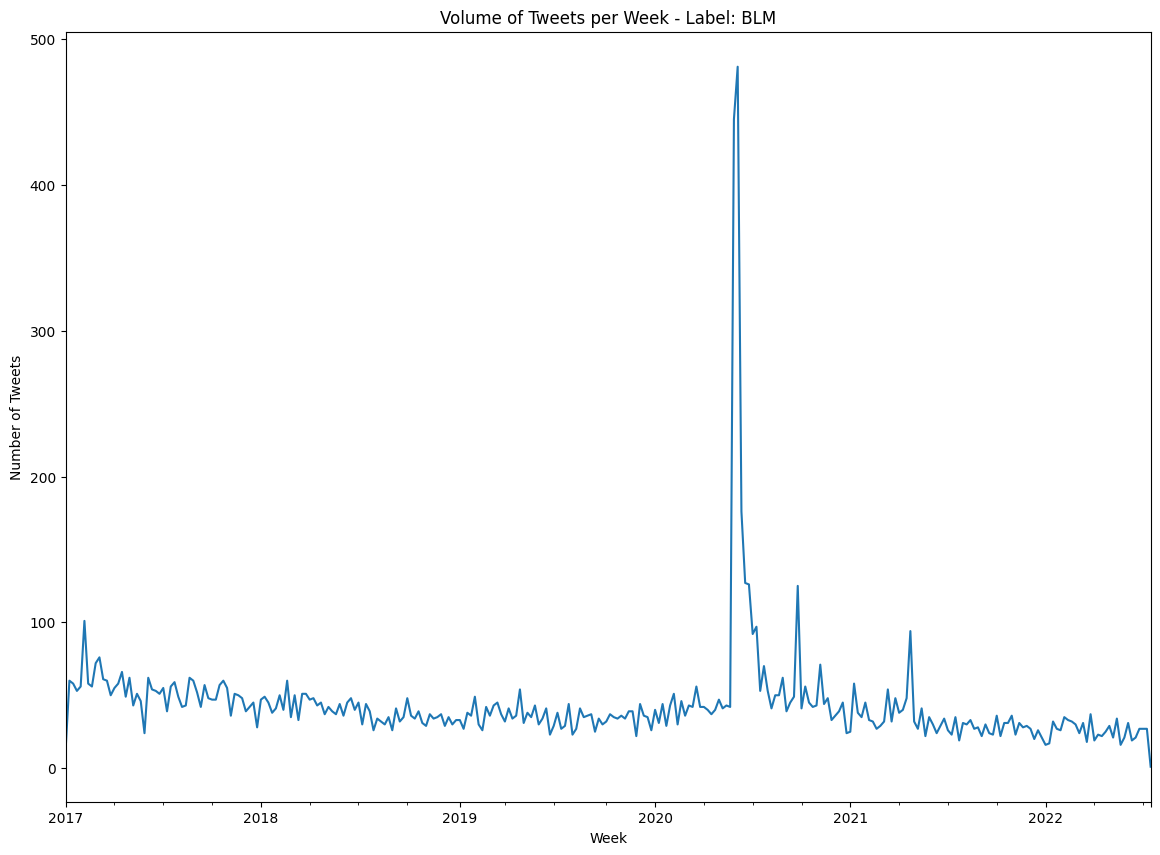

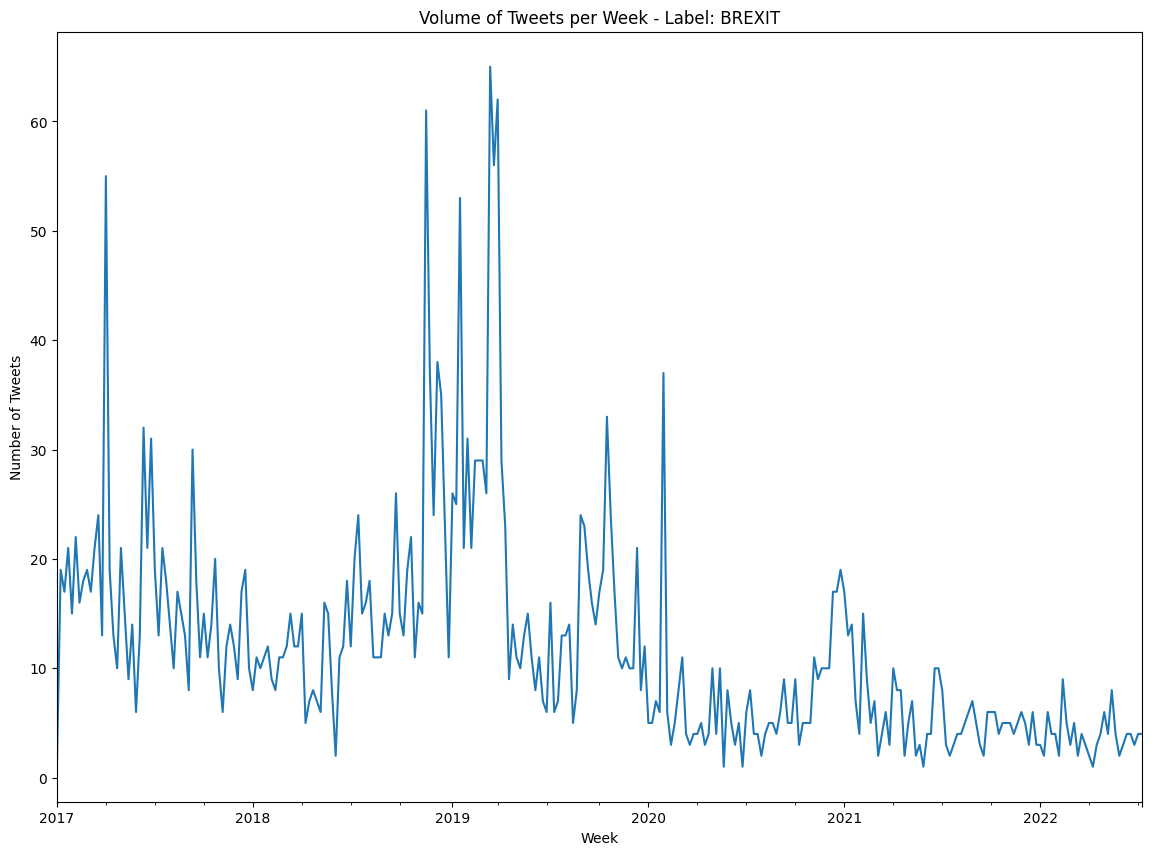

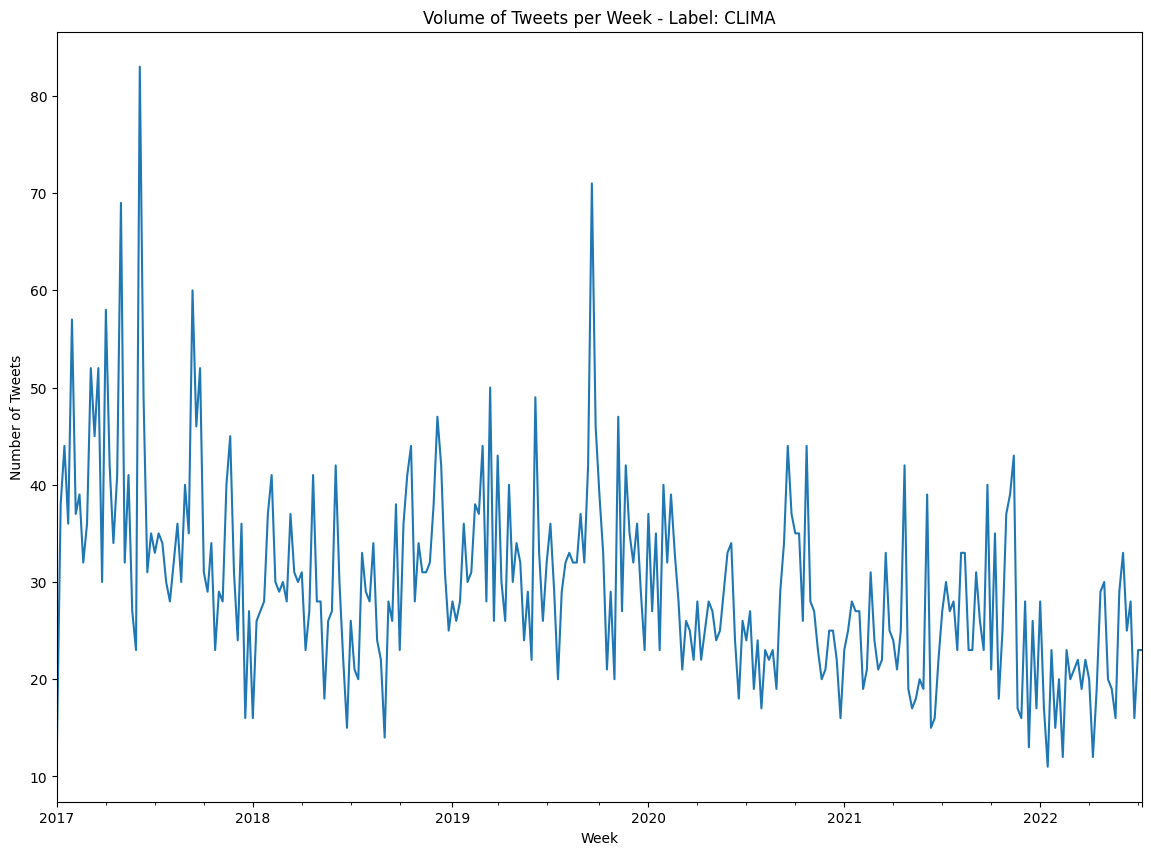

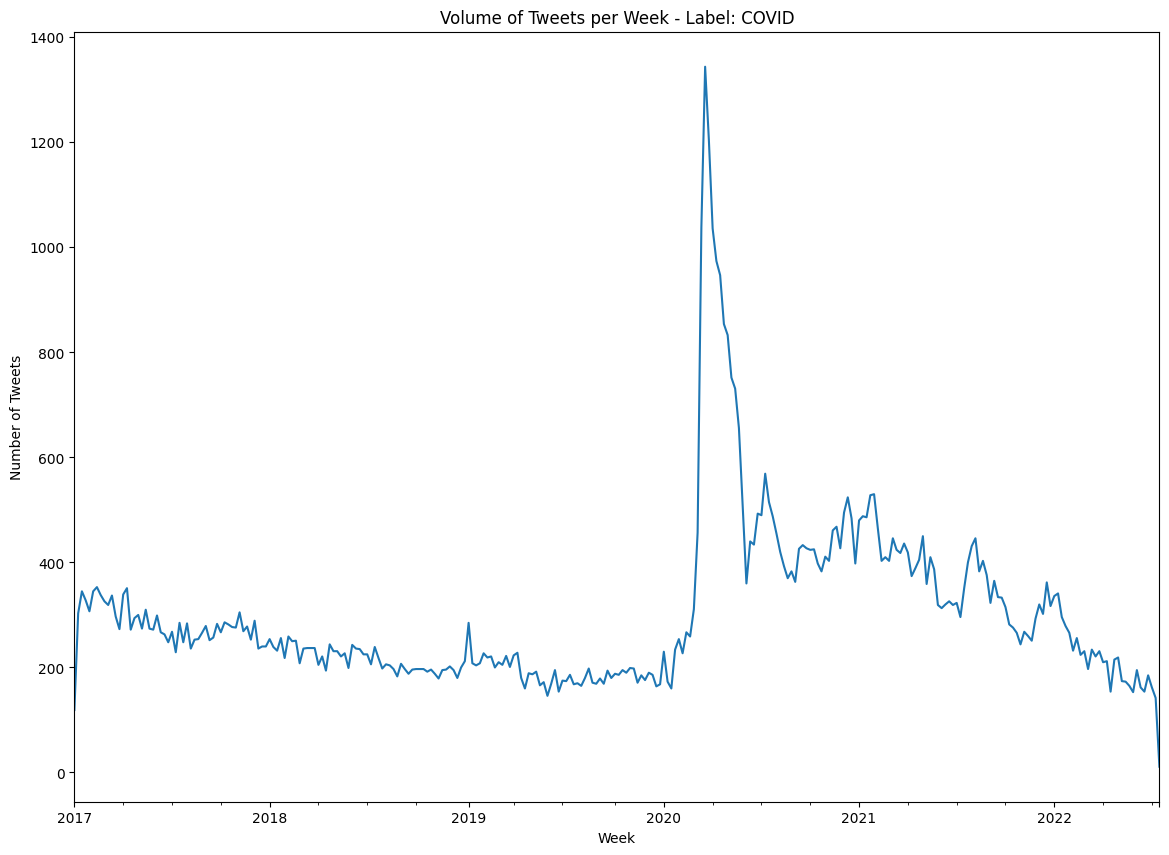

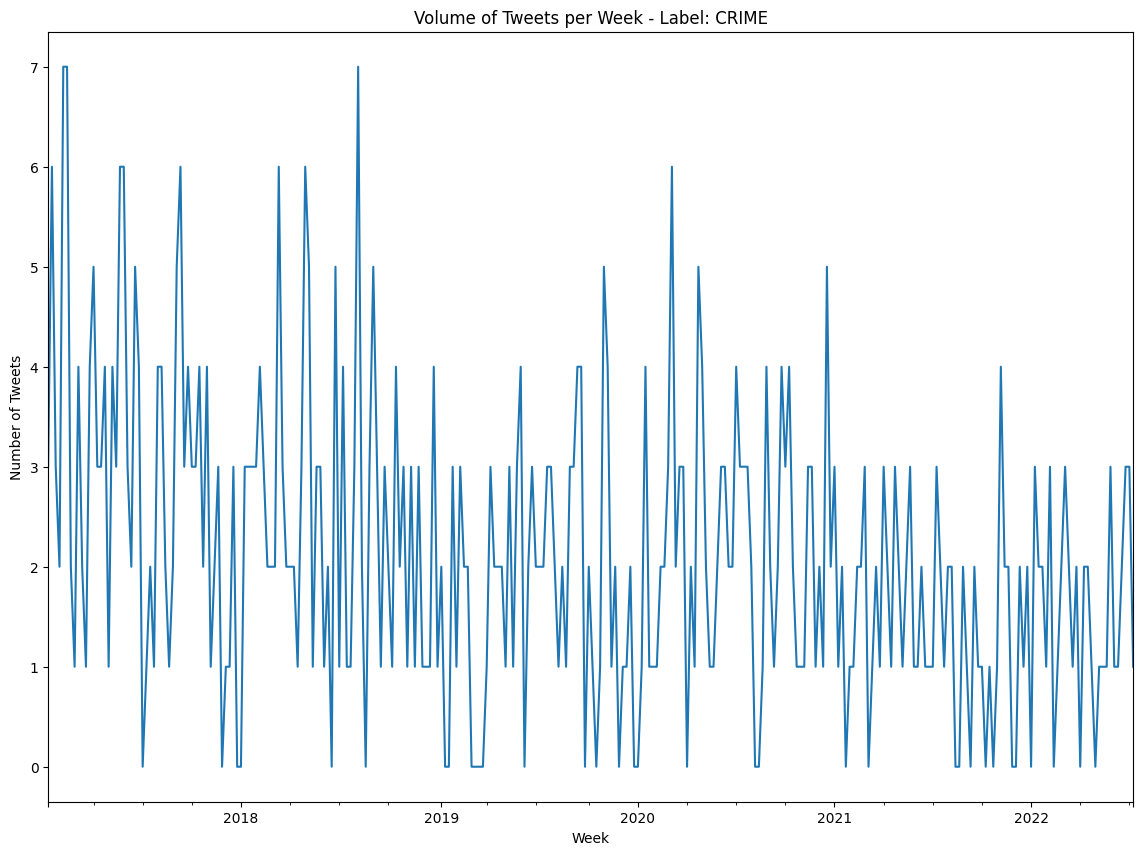

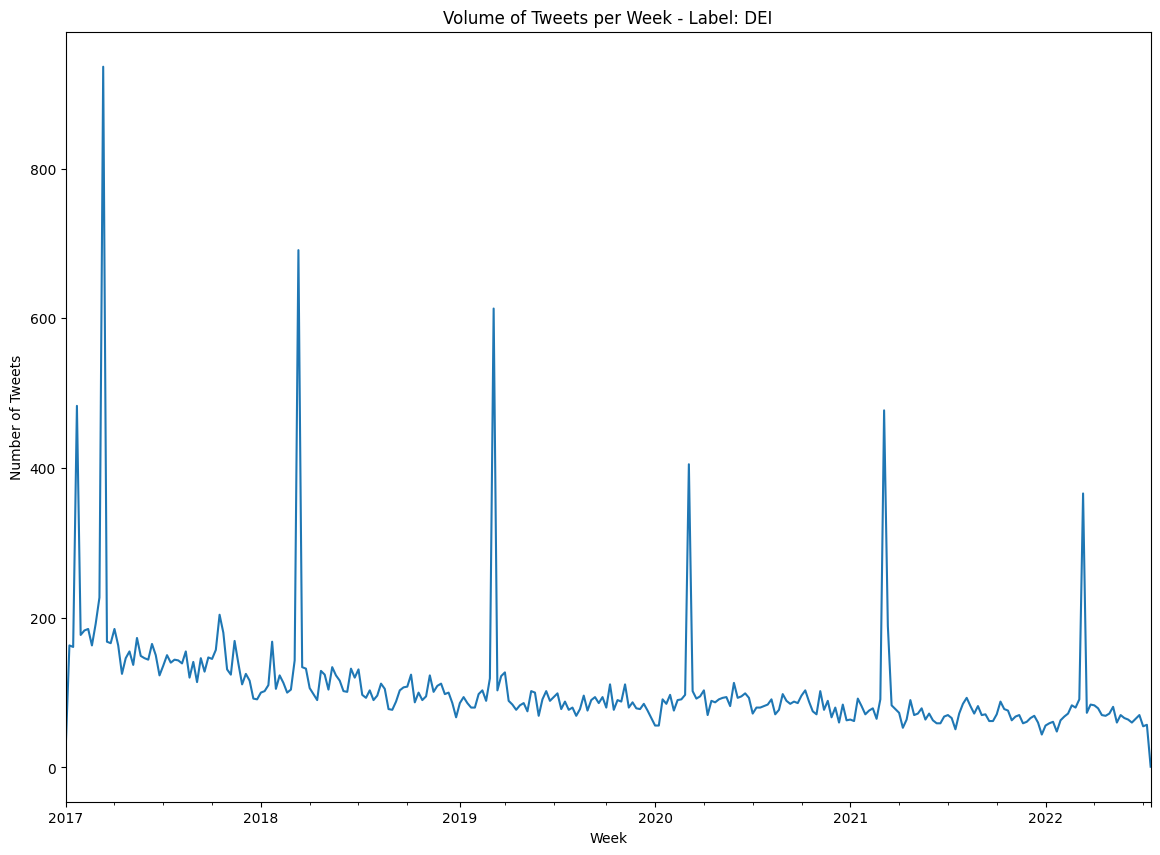

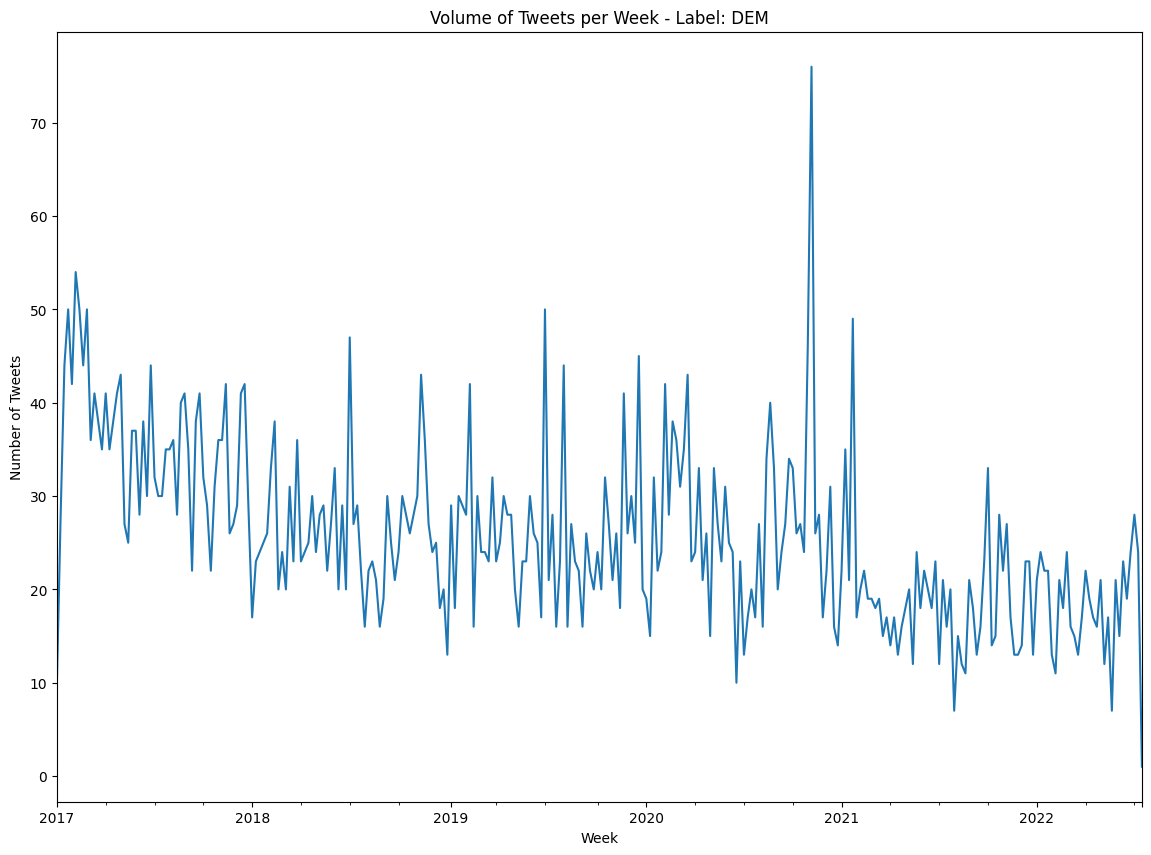

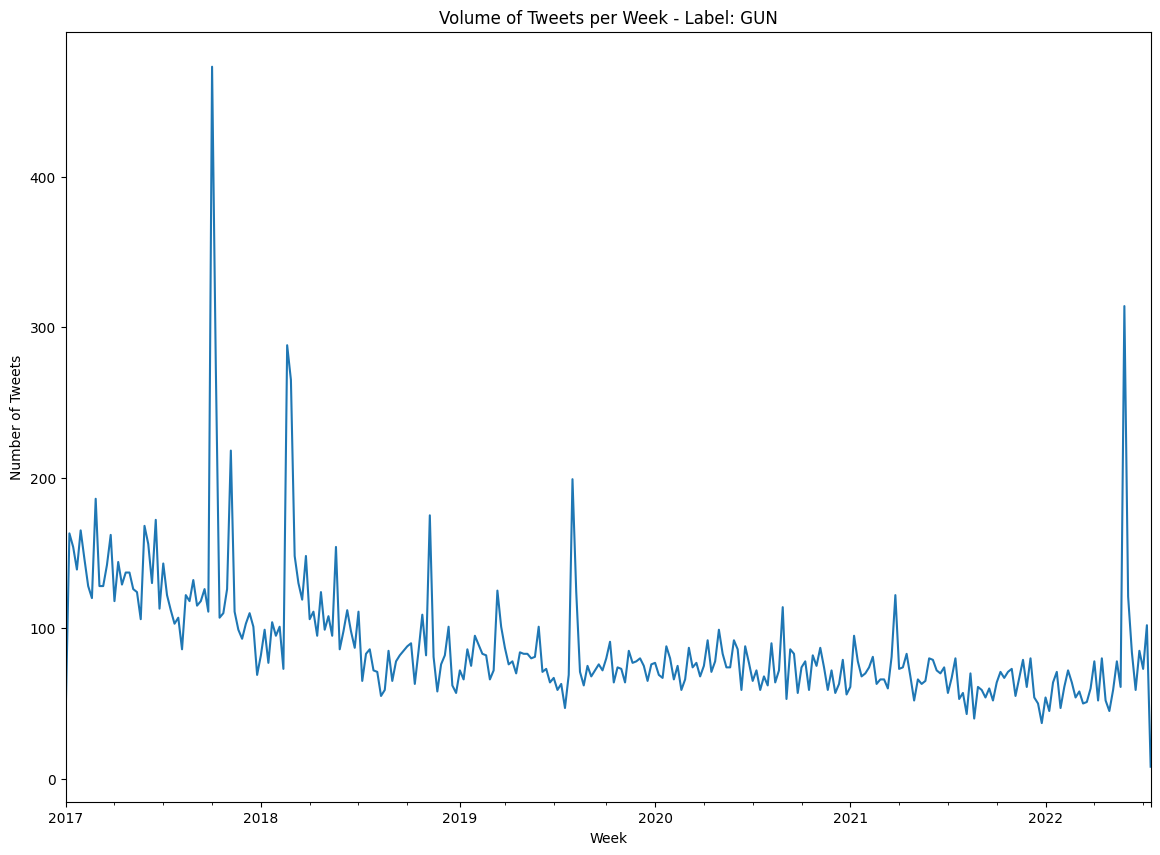

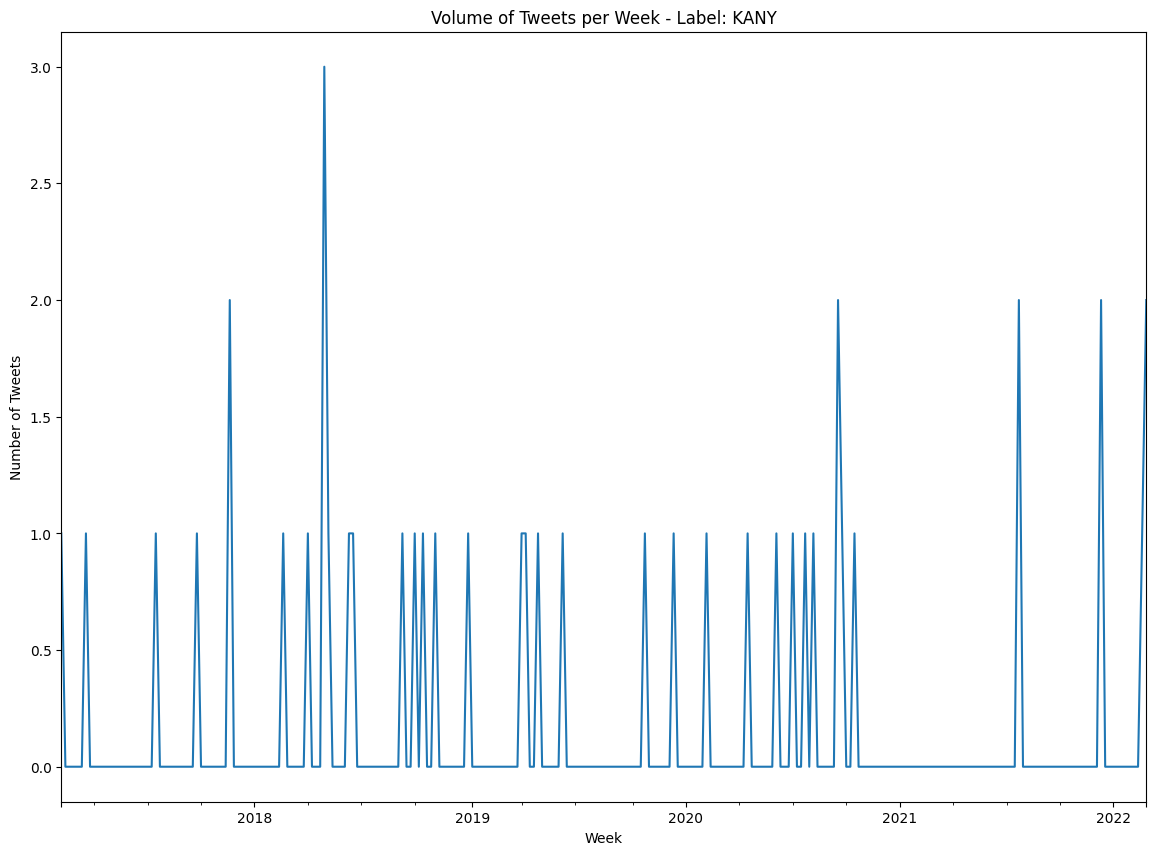

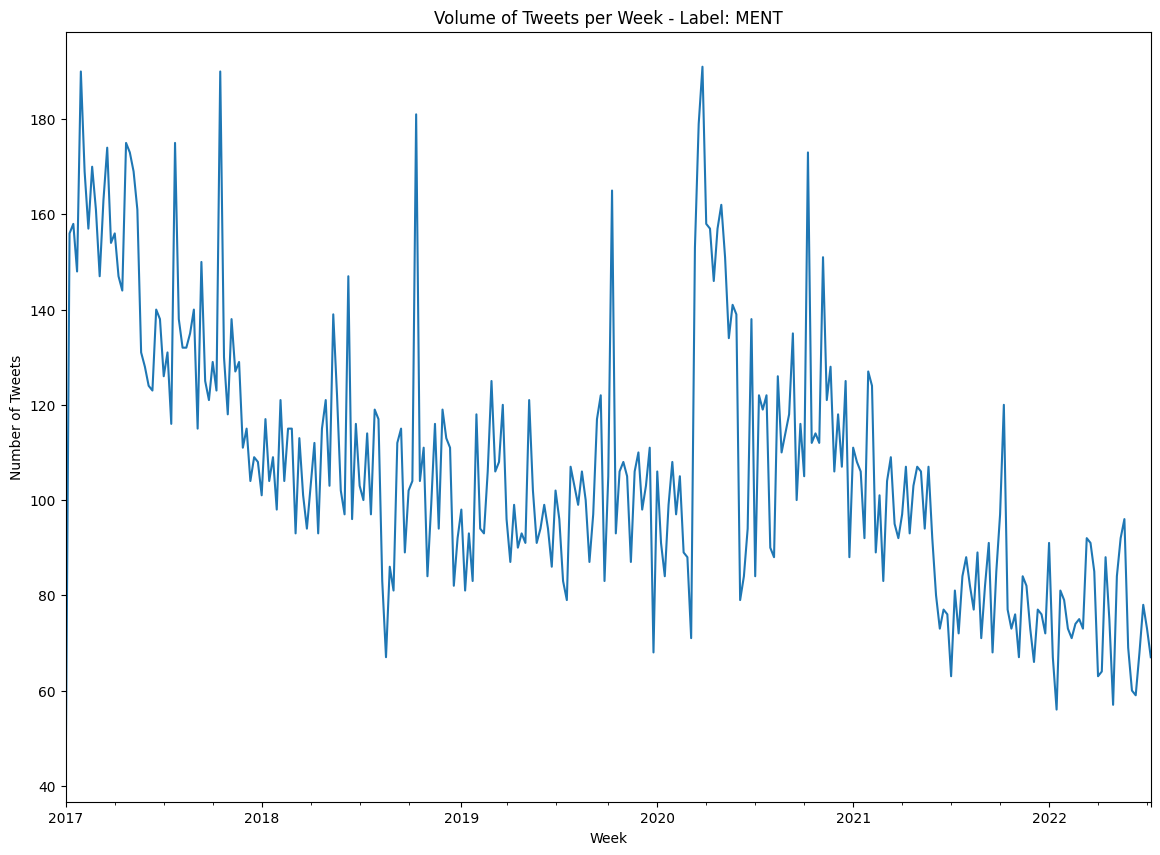

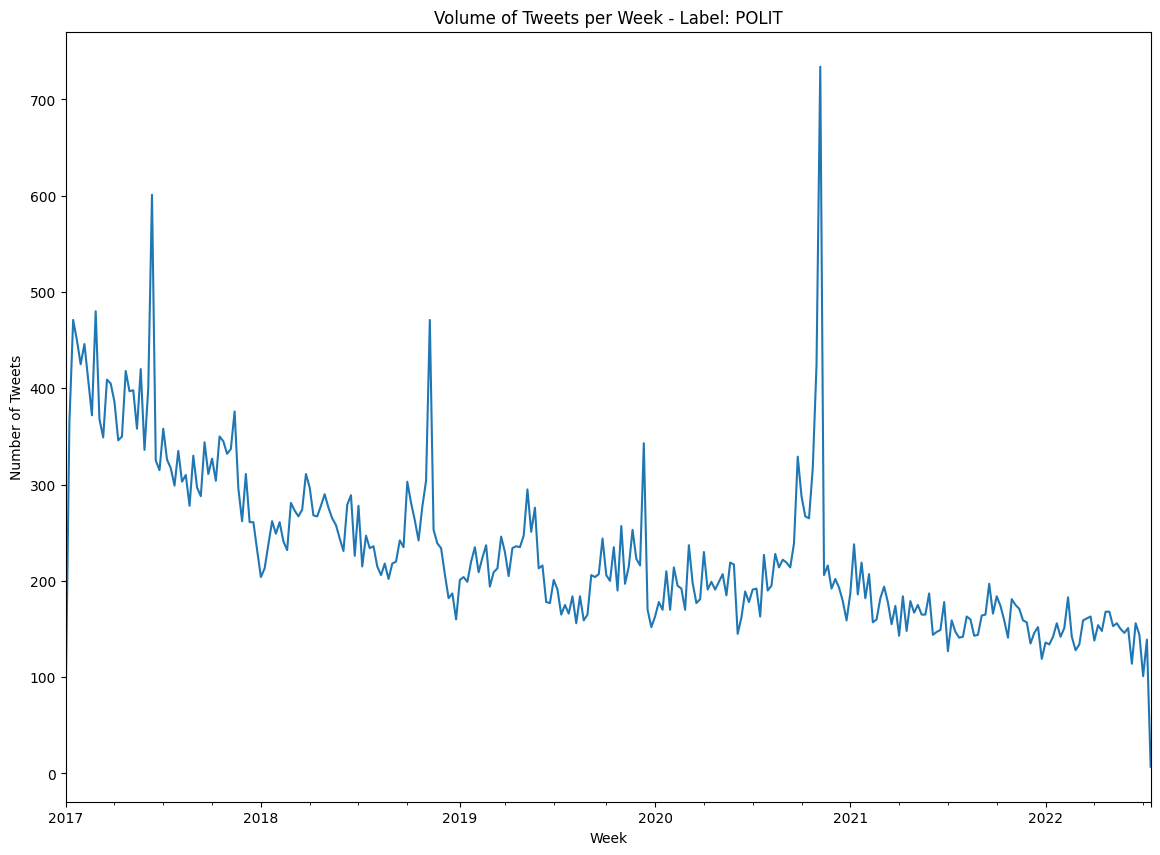

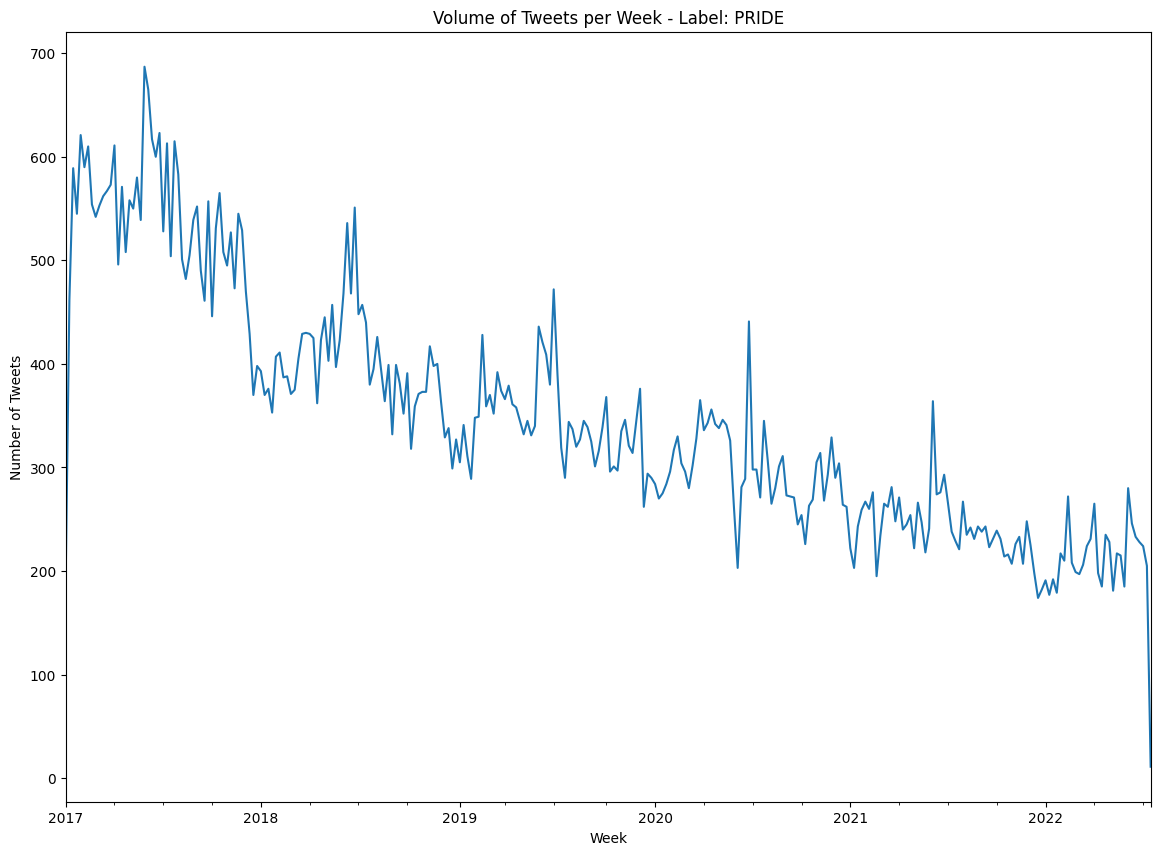

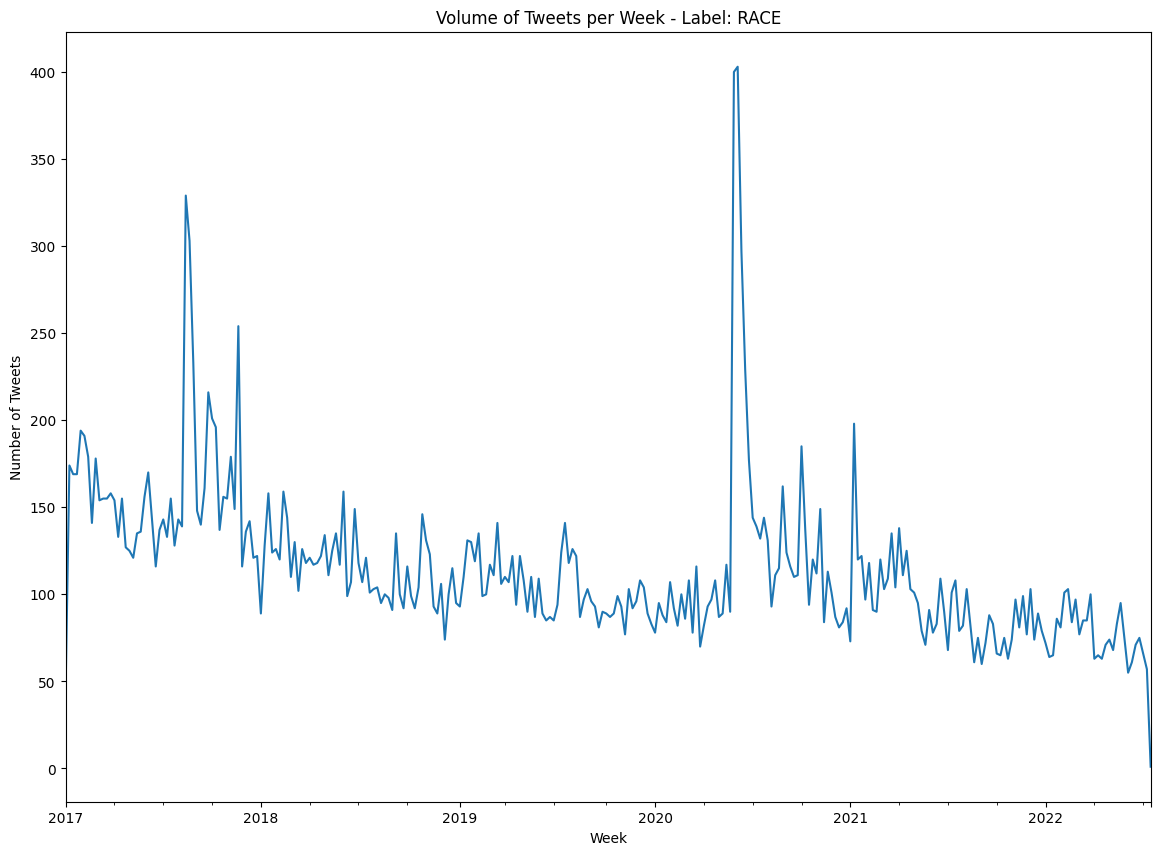

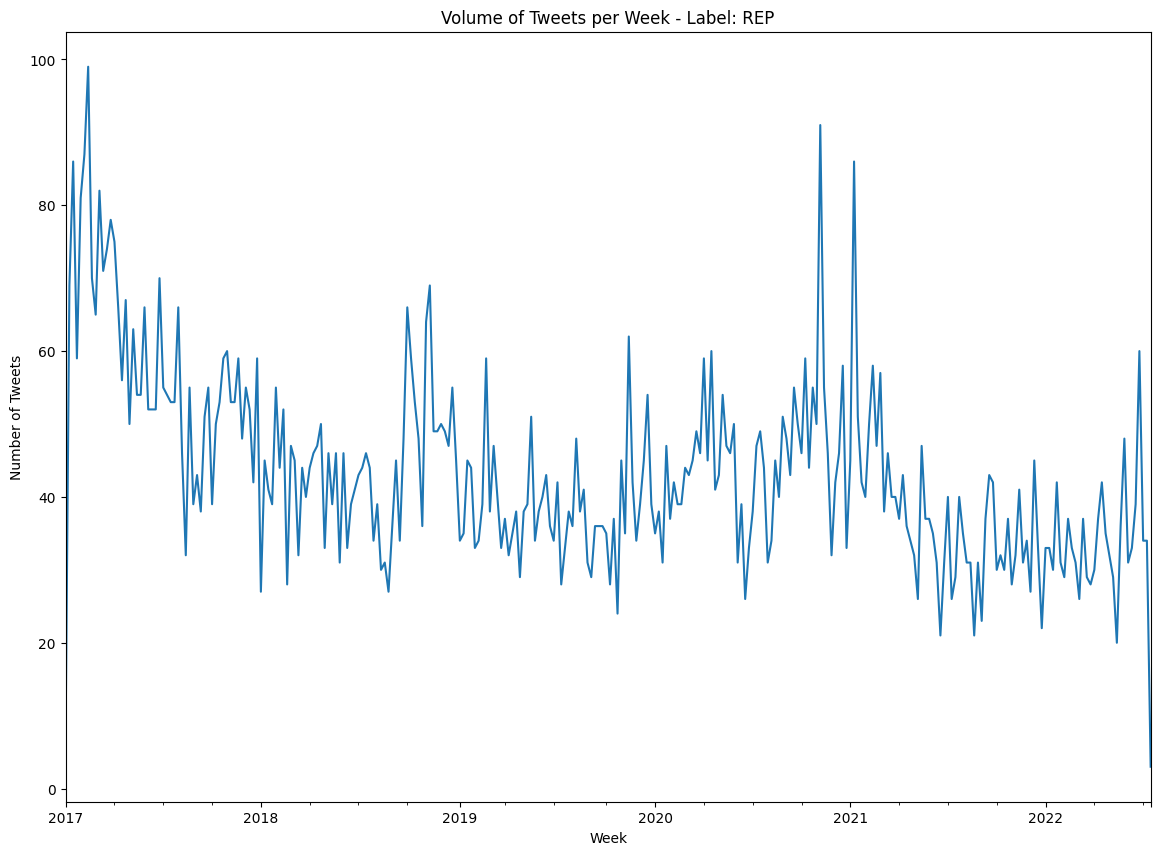

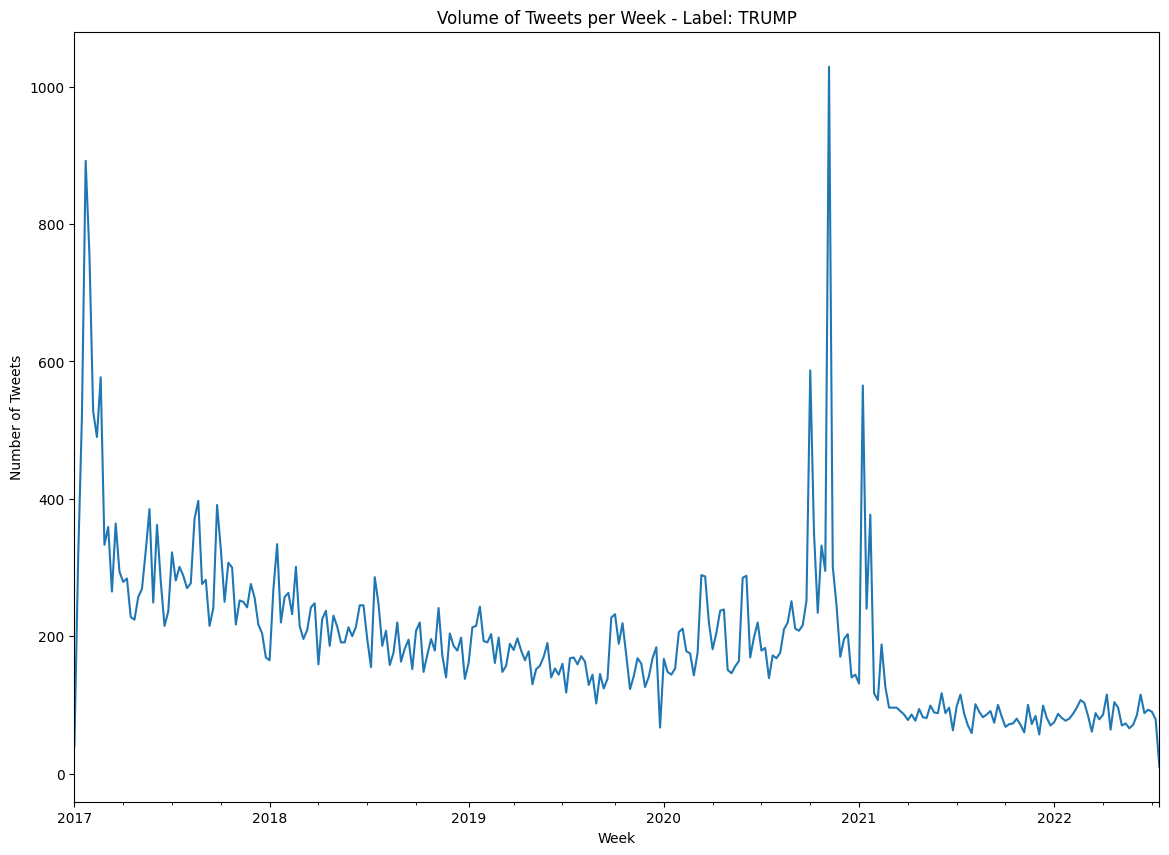

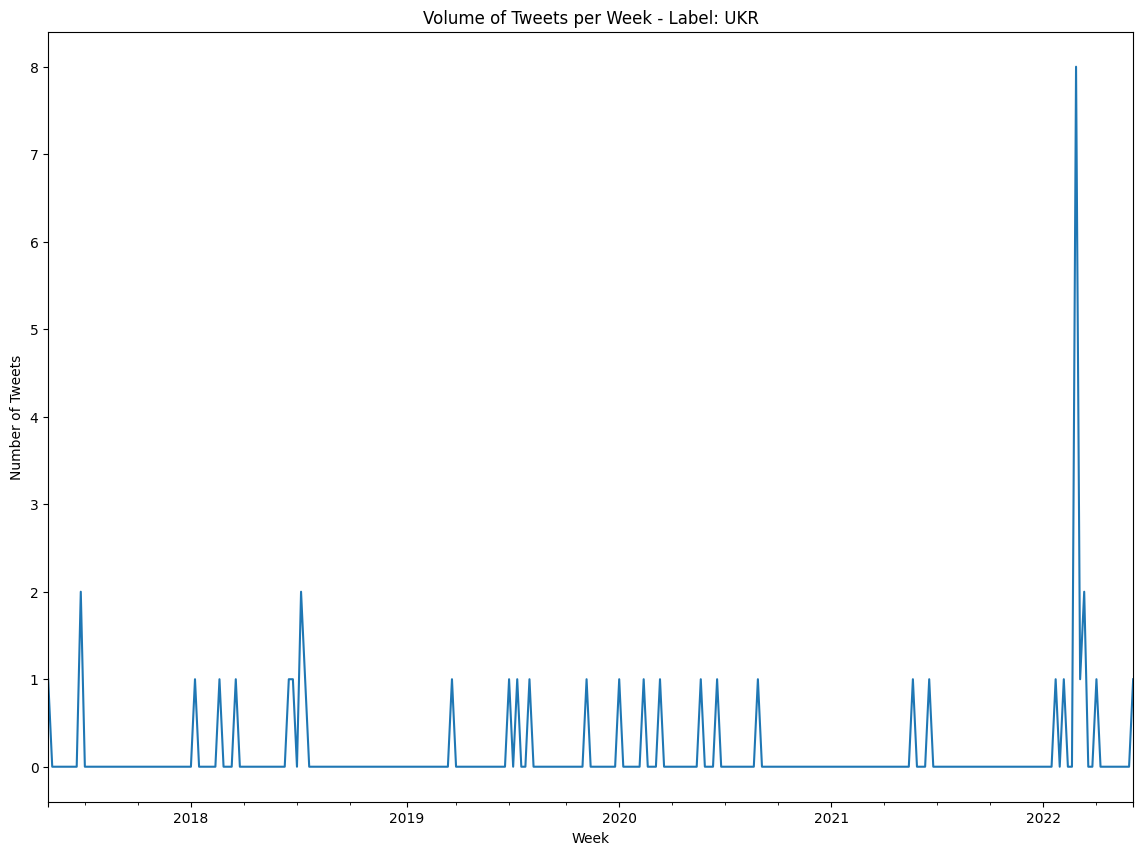

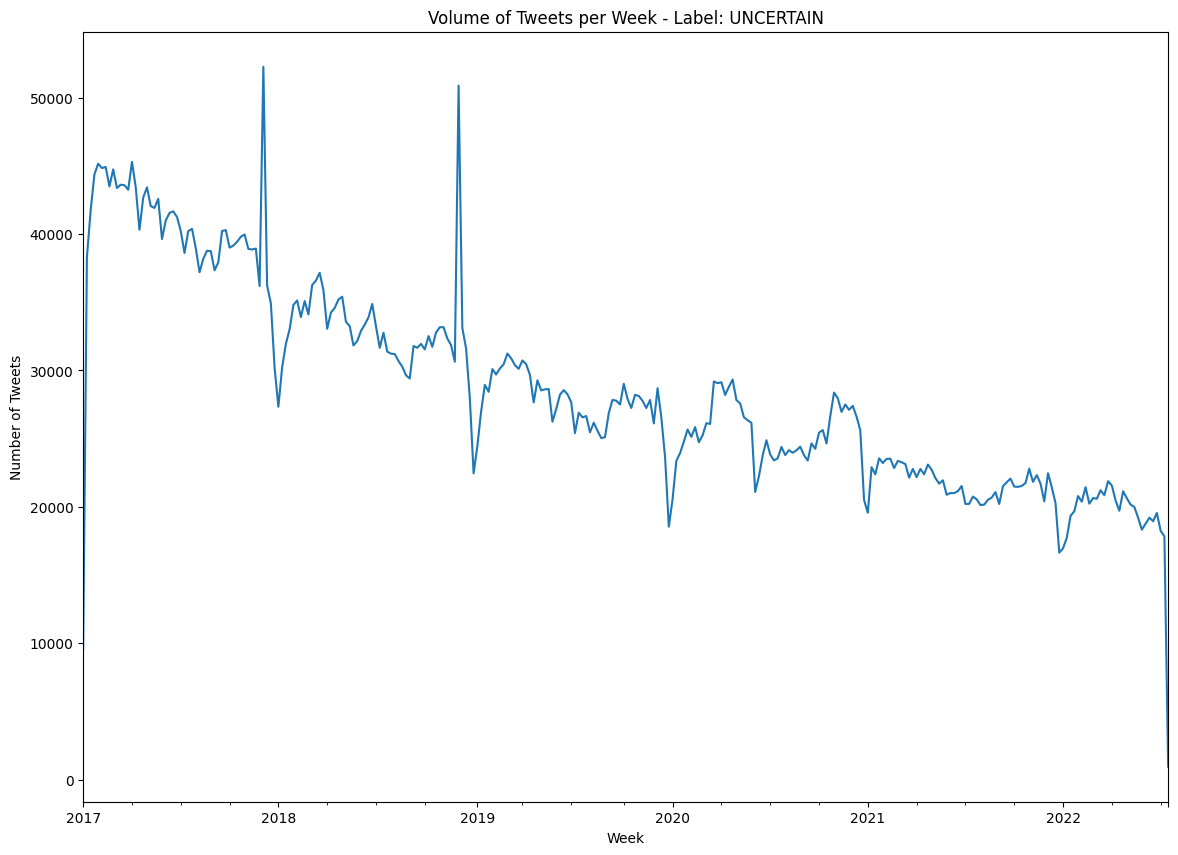

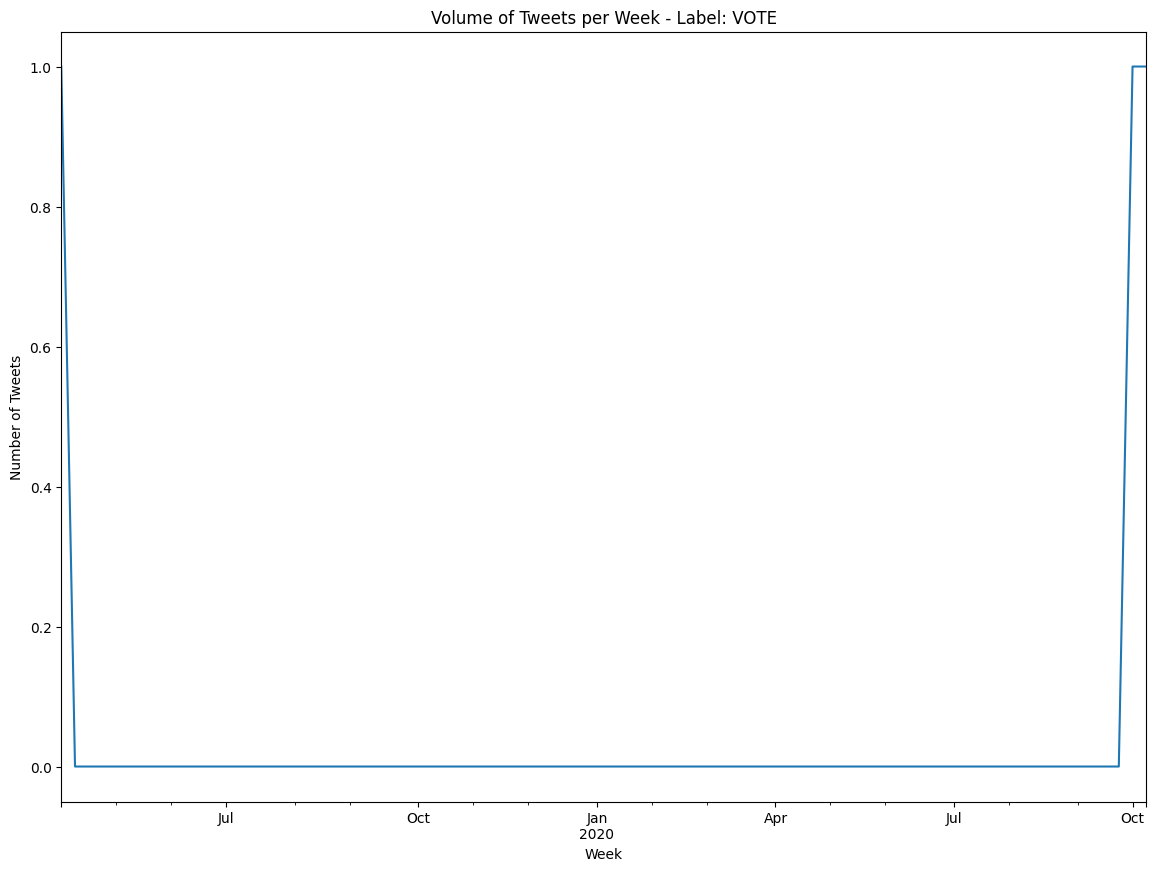

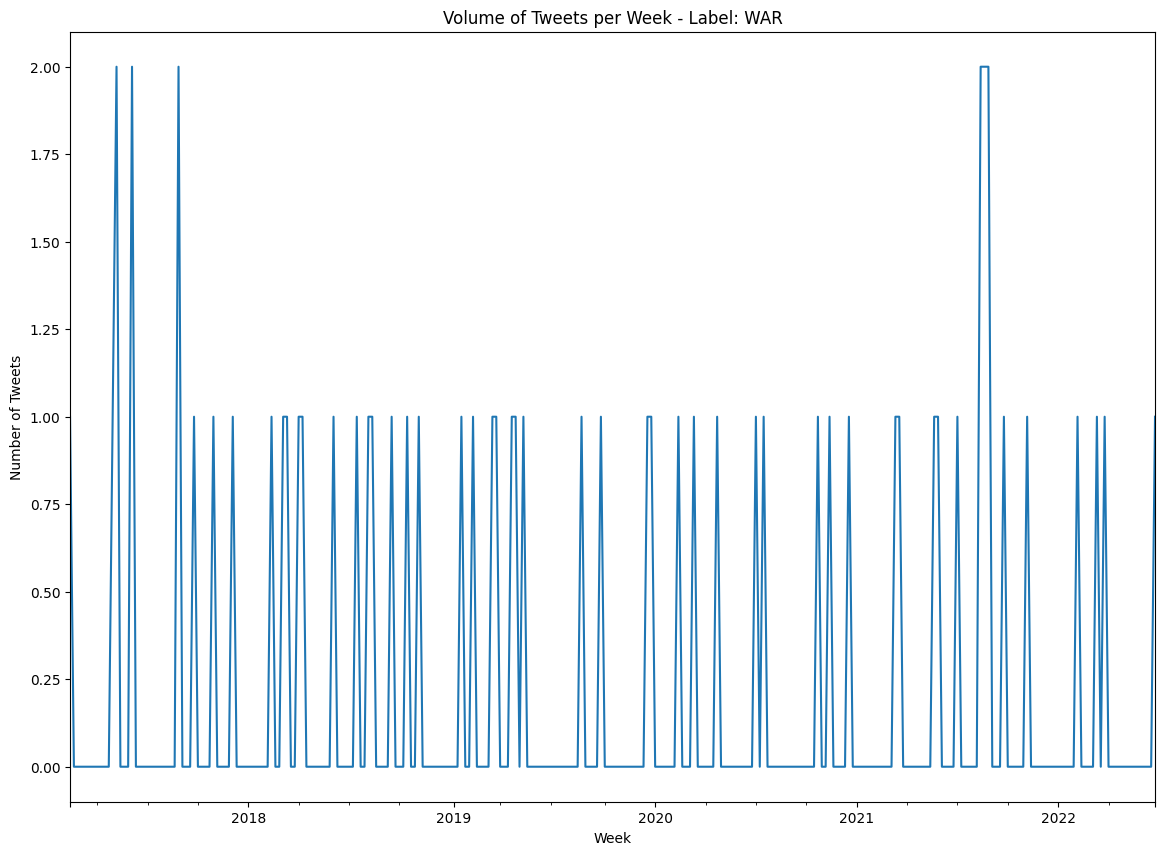

In [19]:
import pandas as pd

# Select the labels to display
selected_labels = ['UNCERTAIN', 'PRIDE', 'POLIT', 'COVID', 'DEI', 'MENT', 'TRUMP', 'GUN', 'RACE', 'BLM', 'REP', 'DEM', 'CLIMA', 'ABORT', 'BREXIT', 'BIDEN', 'CRIME', 'WAR', 'UKR', 'KANY', 'VOTE']

# Filter the dataframe for the selected labels
df_selected_labels_unique = df_unique[df_unique['labels'].isin(selected_labels)]

# Convert the 'date' column to datetime type
df_selected_labels_unique['date'] = pd.to_datetime(df_selected_labels_unique['date'])

# Group by 'labels' and iterate over each label
grouped_unique = df_selected_labels_unique.groupby('labels')
for label, group in grouped_unique:
    # Create a new figure and axis for each label
    fig, ax = plt.subplots(figsize=(14, 10))

    # Group by 'week' and count the number of tweets each week for the current label
    tweet_counts_per_week = group.groupby(pd.Grouper(key='date', freq='W-MON')).size()

    # Plot the data for the current label
    tweet_counts_per_week.plot(kind='line', ax=ax)

    # Set the plot title, x-axis label, and y-axis label
    ax.set_title(f'Volume of Tweets per Week - Label: {label}')
    ax.set_xlabel('Week')
    ax.set_ylabel('Number of Tweets')

    # Display the plot
    plt.show()